## One R Classifier
* not used because same results as zero r

## Random Forest
* Kaggle Accuracy: 0.64585

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 |

              precision    recall  f1-score   support

         3.0       0.30      0.18      0.22      1136
         4.0       0.72      0.85      0.78      3281
         5.0       0.19      0.08      0.11       196

    accuracy                           0.65      4613
   macro avg       0.40      0.37      0.37      4613
weighted avg       0.60      0.65      0.62      4613

len(predictions): 5766
predicted class: 4.0


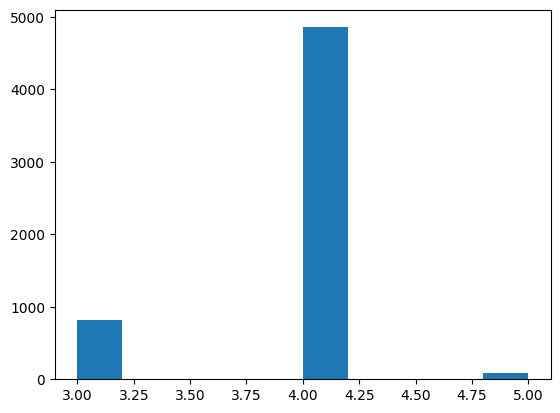

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Preprocess Data


features = train_df.drop('rating_label', axis=1)
labels = train_df['rating_label']

# Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train Model
rf_model.fit(X_train, y_train)

# Predict Labels on training set and evaluate
y_pred = rf_model.predict(X_val)
print(classification_report(y_val, y_pred))

# Predict Labels on test set
predictions = rf_model.predict(test_df)
print(f"len(predictions): {len(predictions)}")
print(f"predicted class: {predictions[0]}")

# plot a bar chart of the predictions
plt.hist(predictions)

# Export Results
results_to_csv('rf.csv', predictions)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Preprocess data
train_df = preprocess(TRAIN_FILE)
test_df = preprocess(TEST_FILE)

# Train model
X = train_df.drop(['rating_label'], axis=1)
y = train_df['rating_label']

one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X, y)

importances = one_r.feature_importances_
max_index = np.argmax(importances)
best_feature_name = train_df.columns[max_index]
print(best_feature_name)

# Predict labels
predictions = one_r.predict(test_df)
print(len(predictions))
plt.hist(predictions)

results_to_csv('one_r.csv', predictions)

## Data Cleaning

train_df rows: 23063, features: 10
Number of duplicates: 5
Number of NaNs: 17350
Name: 0
Authors: 0
PublishYear: 0
PublishMonth: 0
PublishDay: 0
Publisher: 148
Language: 17202
pagesNumber: 0
Description: 0
rating_label: 0
       PublishYear  PublishMonth  PublishDay  Publisher  Language  pagesNumber
2935          1993             6           1        154         1          398
7721          2005             9          27       4218        18          203
8832          2007             6           1       1880        18          280
4702          2007             2           1       2979        18          249
3948          1995            11           1        435         1          368
...            ...           ...         ...        ...       ...          ...
11964         2003             7           1       3138        18          177
21575         2003             4           1       3741         1          424
5390          2004             1          23       3390        18  

C:\Users\user\AppData\Local\Temp\ipykernel_22072\1536043514.py:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['rating_label'], shade = True)


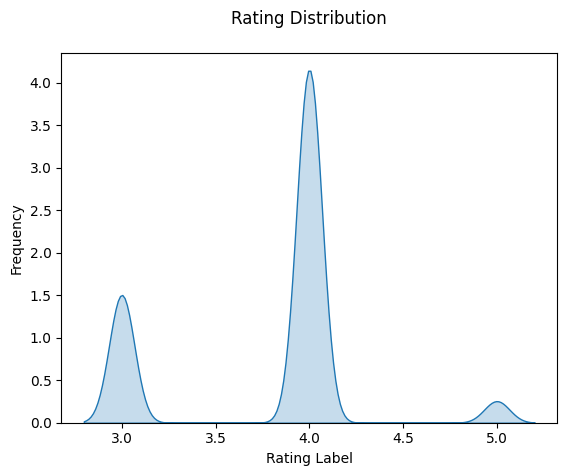

In [ ]:
train_df = pd.read_csv(TRAIN_FILE)
print(f"train_df rows: {train_df.shape[0]}, features: {train_df.shape[1]}")

# Check for duplicates
num_dups = train_df.duplicated().sum()
print(f"Number of duplicates: {num_dups}")

# Check for NaNs
num_nans = train_df.isna().sum().sum()
print(f"Number of NaNs: {num_nans}")
for column in train_df.columns:
    null_count = train_df[column].isnull().sum()
    print(f"{column}: {null_count}")

X_train, X_val, y_train, y_val, test_df = get_dfs(config)
print(X_train)
X_train = apply_imputation(X_train, 'Language', 'knn')
num_nans = X_train.isna().sum().sum()
print(f"\nNumber of NaNs: {num_nans}")
for column in X_train.columns:
    null_count = X_train[column].isnull().sum()
    print(f"{column}: {null_count}")

# ratings distribution
sns.kdeplot(train_df['rating_label'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating Label')
plt.ylabel('Frequency')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'eng'),
  Text(1, 0, 'fre'),
  Text(2, 0, 'spa'),
  Text(3, 0, 'ger'),
  Text(4, 0, 'jpn'),
  Text(5, 0, 'per'),
  Text(6, 0, 'mul'),
  Text(7, 0, 'por'),
  Text(8, 0, 'lat'),
  Text(9, 0, 'ita'),
  Text(10, 0, 'zho'),
  Text(11, 0, 'grc'),
  Text(12, 0, 'heb'),
  Text(13, 0, 'rus'),
  Text(14, 0, 'ara'),
  Text(15, 0, 'swe'),
  Text(16, 0, 'frs'),
  Text(17, 0, 'nld')])

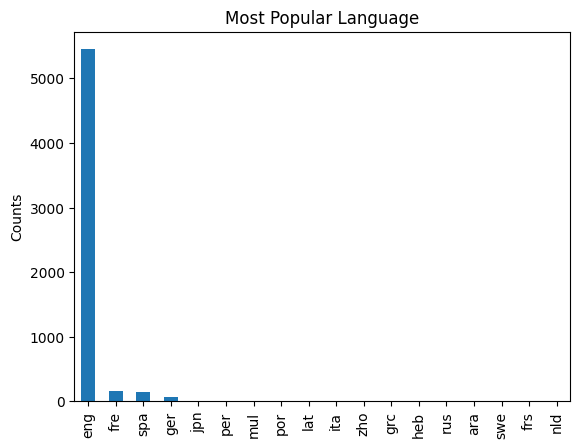

In [ ]:
# top languages
train_df['Language'].value_counts().plot(kind='bar')
plt.title('Most Popular Language')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [ ]:
# top languages
train_df['Authors'].value_counts().plot(kind='bar')
plt.title('Most Popular Authors')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

## Feature Selection

In [ ]:
# Train Model
X = normalise(train_df.drop('rating_label', axis=1))
y = train_df['rating_label']

# combine x and y into 1 df
df = pd.concat([X, y], axis=1)
df.head()

,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,rating_label
0,0.910714,0.454545,0.0,0.862727,1.000000,0.001297,4.0
1,0.827381,0.818182,0.0,0.260890,1.000000,0.009838,4.0
2,0.910714,0.181818,1.0,0.190723,1.000000,0.000865,4.0
3,0.904762,0.727273,0.0,0.113021,1.000000,0.007919,4.0
4,0.910714,0.545455,0.2,0.663998,0.055556,0.009514,3.0


In [ ]:
import seaborn as sns
import pandas as pd

# Train Model
X = normalise(train_df.drop('rating_label', axis=1))
y = train_df['rating_label']

# combine x and y into 1 df
df = pd.concat([X, y], axis=1)

# create a pairplot using Seaborn
sns.pairplot(df, hue="rating_label")

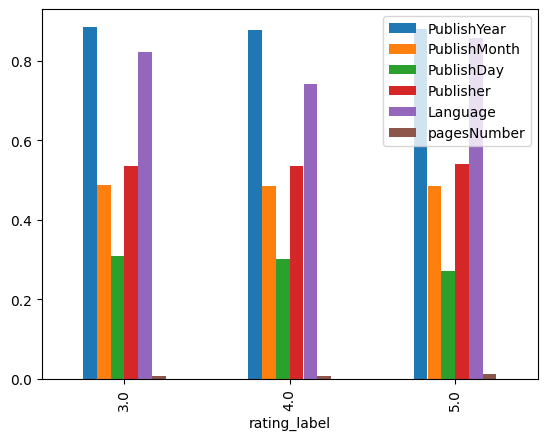

In [ ]:
df = normalise(train_df.drop('rating_label', axis=1))
df['rating_label']  = train_df['rating_label']
grouped = df.groupby('rating_label').mean()
grouped.plot.bar()
plt.show()

In [ ]:
X = normalise(train_df.drop('rating_label', axis=1))
y = train_df['rating_label']
for feature in X.columns:
    plt.figure()
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('label')
    plt.show()

In [ ]:
# chi-squared test
from sklearn.feature_selection import chi2
from scipy.sparse import coo_matrix

# Assume X is your feature matrix
X = add_countvec_features( normalise(train_df.drop('rating_label', axis=1)), "train")
# print(type(X))
print(X.shape)
y = train_df['rating_label']
# chi_scores, p_values = chi2(X, y)
# k = 10
# top_features_indices = np.argsort(chi_scores)[-k:]
# print(top_features_indices)

# X_selected = X.iloc[:, top_features_indices]
# print(X_selected.head())

# Assume X is your feature matrix in COO format, and y is your target variable
num_top_features = 1000

# Compute the chi-squared scores and p-values for each feature
chi2_scores, p_values = chi2(X, y)

# Get the indices of the top k features based on the chi2 scores
top_feature_indices = chi2_scores.argsort()[::-1][:num_top_features]

# Convert the COO matrix to a CSC matrix and select the top k features
X_top_features = X.tocsc()[:, top_feature_indices]

# Print the names of the top k features
# print(X_top_features)
print(X_top_features.shape)

(23063, 126890)
(23063, 1000)


In [ ]:
preprocess(TRAIN_FILE).head()

In [ ]:
# NORMALISATION
# Preprocess Data
train_df = preprocess(TRAIN_FILE)
test_df = normalise(preprocess(TEST_FILE))

# Train Model
X = normalise(train_df.drop('rating_label', axis=1))
y = train_df['rating_label']

X.head()

,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber
0,0.910714,0.454545,0.0,0.862727,1.000000,0.001297
1,0.827381,0.818182,0.0,0.260890,1.000000,0.009838
2,0.910714,0.181818,1.0,0.190723,1.000000,0.000865
3,0.904762,0.727273,0.0,0.113021,1.000000,0.007919
4,0.910714,0.545455,0.2,0.663998,0.055556,0.009514


In [ ]:
train_df = preprocess(TRAIN_FILE)
test_df = preprocess(TEST_FILE)

# Train Model
X = train_df.drop('rating_label', axis=1)
y = train_df['rating_label']
X = add_countvec_features(X, "train")
print(X)

In [ ]:
authors_vocab = pickle.load(open(f"{COUNTVEC_FOLDER}/train_authors_countvectorizer.pkl", "rb"))
authors_vocab_dict = authors_vocab.vocabulary_
print(len(authors_vocab_dict))

desc_vocab = pickle.load(open(f"{COUNTVEC_FOLDER}/train_desc_countvectorizer.pkl", "rb"))
desc_vocab_dict = desc_vocab.vocabulary_
print(len(desc_vocab_dict))

In [ ]:
name_vec = scipy.sparse.load_npz(f"{COUNTVEC_FOLDER}/train_name_vec.npz")
authors_vec = scipy.sparse.load_npz(f"{COUNTVEC_FOLDER}/train_authors_vec.npz")
desc_vec = scipy.sparse.load_npz(f"{COUNTVEC_FOLDER}/train_desc_vec.npz")